# Weighted ECM clustering
## Toys dataset - 2 clusters, 6 dimensions


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, plotting
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


          0         1         2         3         4         5
0  0.223248  2.606554 -0.669845 -3.047209  4.858650  0.967867
1  0.570278 -0.831117 -1.704321  0.561818  0.178342  0.884180
2  1.393925  0.676908  1.102410 -2.709991 -0.611678  1.199641
3  2.329831 -3.047742 -1.956628  6.087984 -2.378940  1.282781
4  3.288549  0.391498 -0.672776 -1.564350  1.259775  0.482085


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


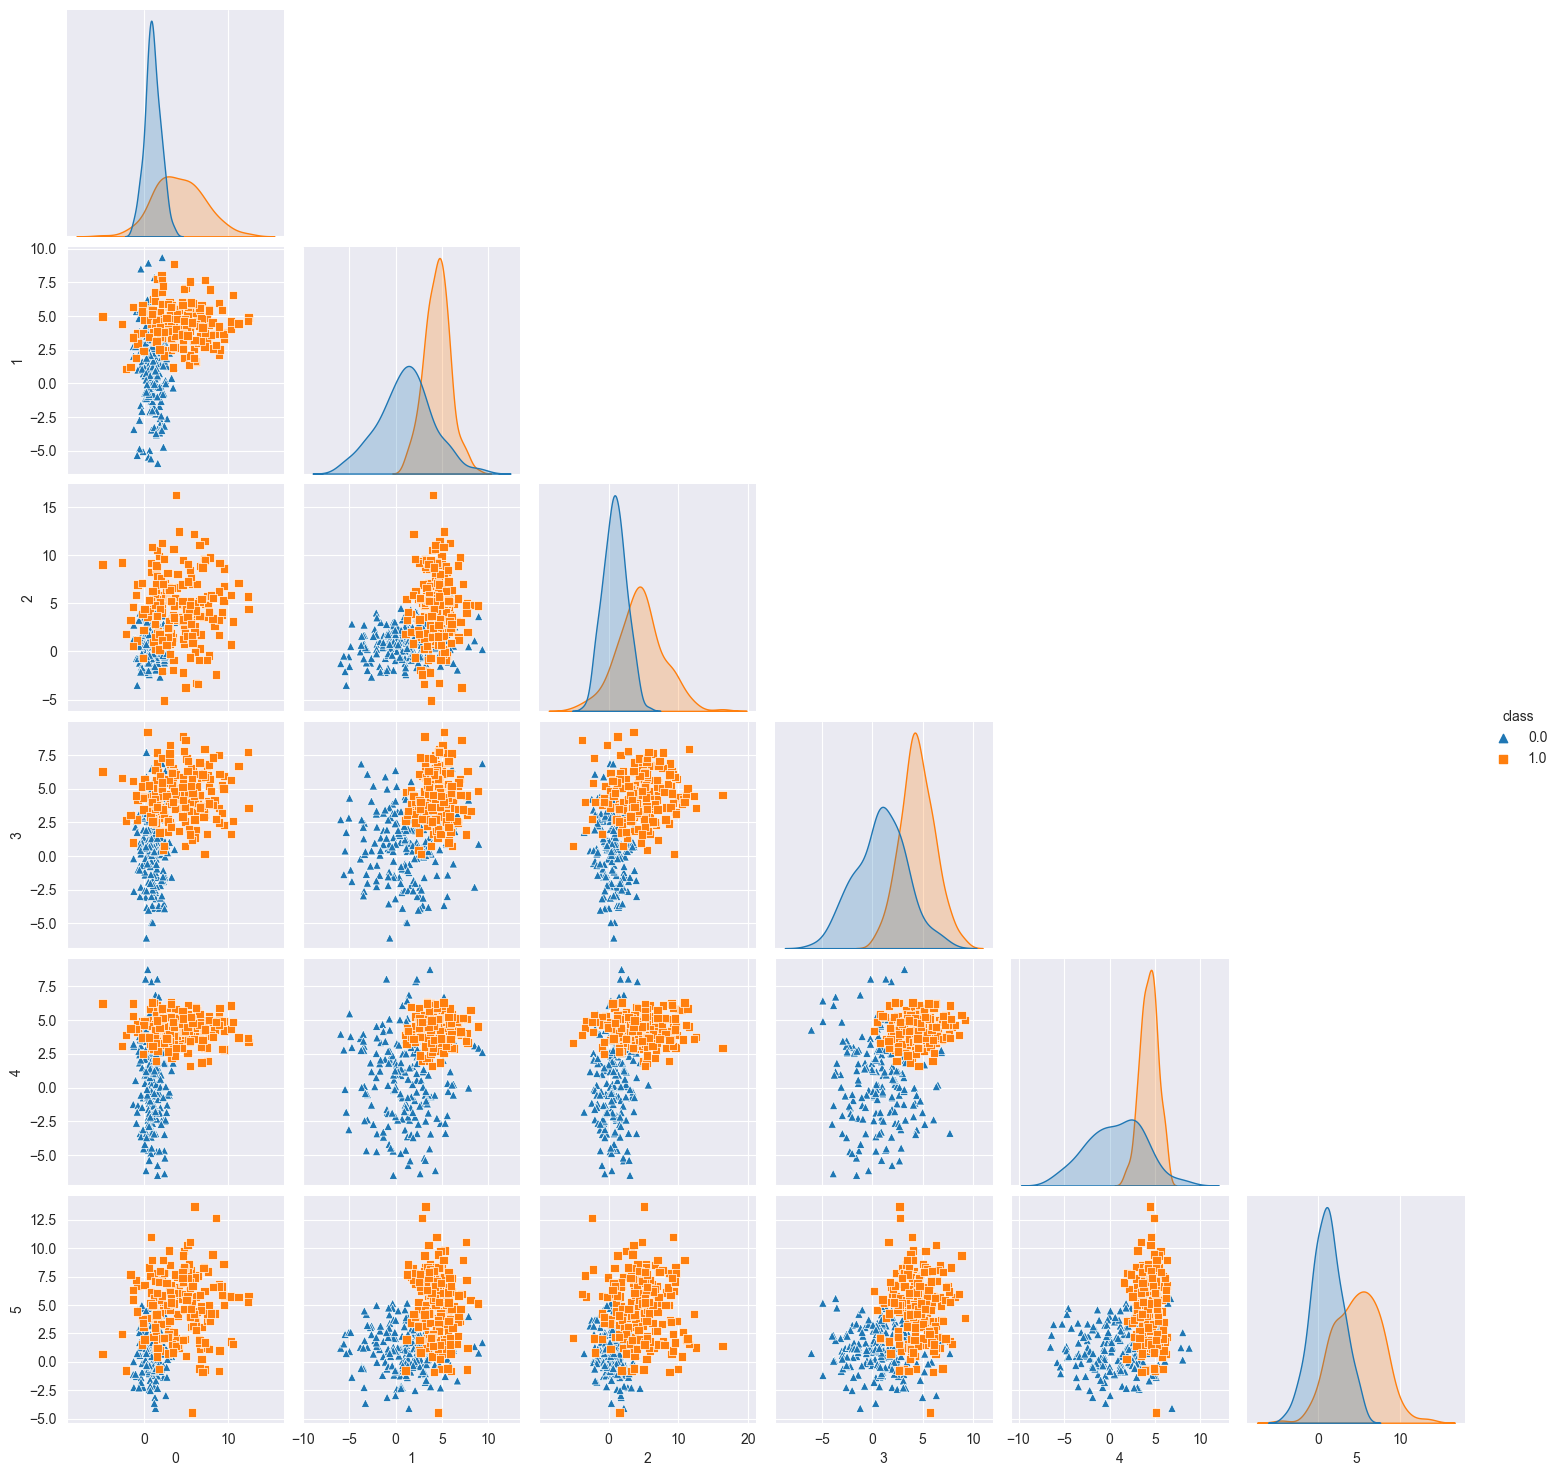

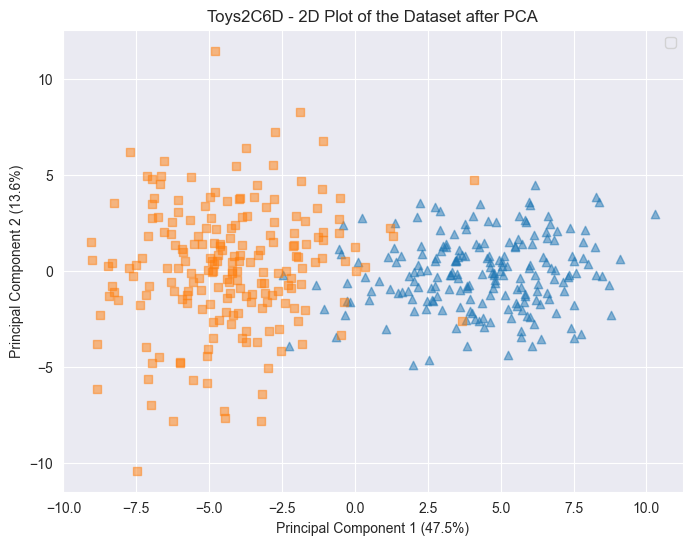

In [2]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c6dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1]) 

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C6D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [14]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=2, beta=2, alpha=1, delta=delta, init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

J values: [25.646771971452743, 25.646771971452743, 25.646771971452743, 25.646789963192347, 25.646789963192347, 25.646789963192347, 25.646789963192347, 25.646789963192347, 25.646789963192347, 25.646789963192347]
ARI values: [0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241]
NS values: [0.9602956031114156, 0.9602956031114156, 0.9602956031114156, 0.9602500811974478, 1.002708017240053, 1.002708017240053, 0.9602500811974478, 1.002708017240053, 0.9602500811974478, 1.002708017240053]
NMI values: [0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102]
Average ARI values: 0.8364260858597241
Average Non-specificity: 0.9772469121886802
Average Normalized mutual infor: 0.7651081159700102
Center: [[0.51484706

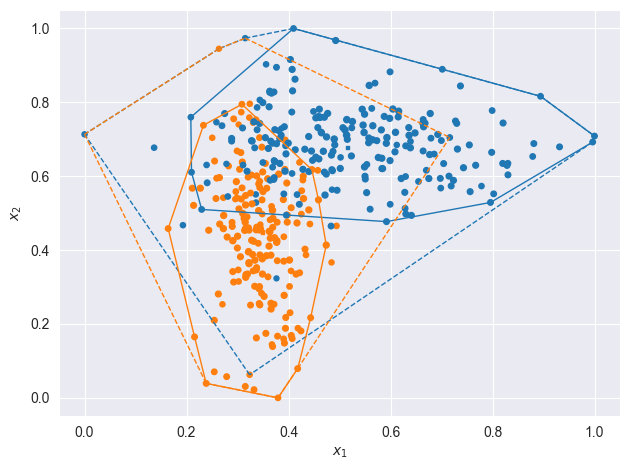

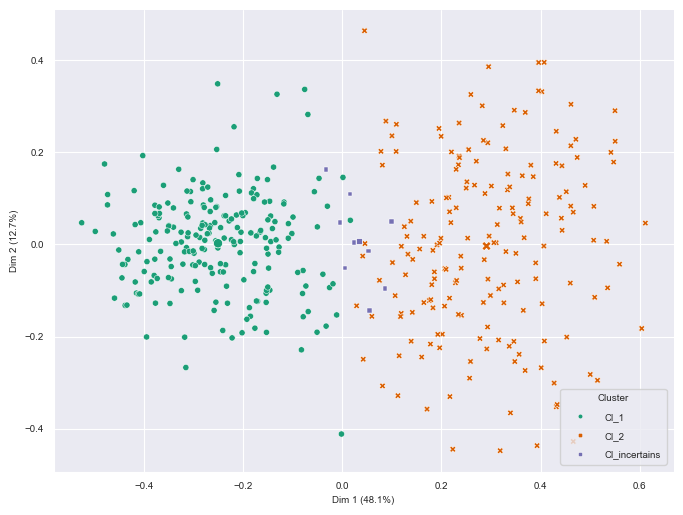

In [15]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")
print(f"Center: {model_list[0]['g']}")
# Plotting the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

## Weighted ECM (WECM)

In [19]:
%%capture
model_list = np.array([])
c = 2
d = X.shape[1]
delta = np.sqrt(20)
W = np.ones((c, d)) * (1/d)
for i in range(10):
    model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, stopping_factor="center", init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda model: model['crit'])

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

J values: [0.438773438659287, 0.438773438659287, 0.6079657356209432, 0.6079657356209432, 0.6079657356209432, 0.6079657356209432, 0.6079657356209432, 0.6079657356209432, 0.6079657356209432, 0.6079657356209432]
ARI values: [0.8830236300403461, 0.8830236300403461, 0.8272577886836429, 0.8272577886836429, 0.8272577886836429, 0.8272577886836429, 0.8272577886836429, 0.8272577886836429, 0.8272577886836429, 0.8272577886836429]
NS values: [0.8086119172483076, 0.8086119172483076, 0.965800477623013, 1.0124891825744133, 1.0124891825744133, 0.965800477623013, 1.0124891825744133, 0.965800477623013, 0.965800477623013, 1.0124891825744133]
NMI values: [0.810695098014903, 0.810695098014903, 0.7558400018300403, 0.7558400018300403, 0.7558400018300403, 0.7558400018300403, 0.7558400018300403, 0.7558400018300403, 0.7558400018300403, 0.7558400018300403]
Average ARI values: 0.8384109569549836
Average Non-specificity: 0.953038247528632
Average Normalized mutual infor: 0.7668110210670129


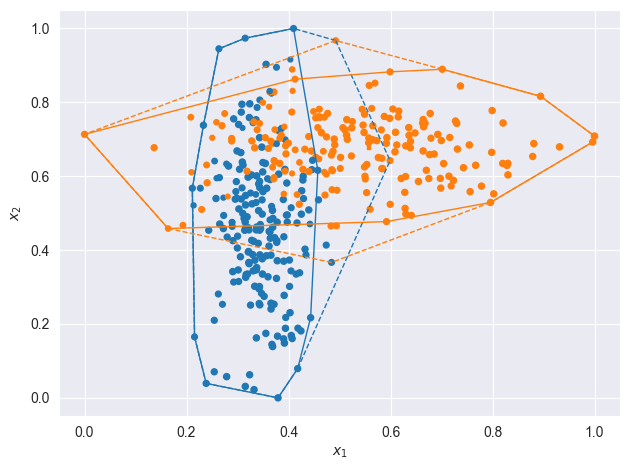

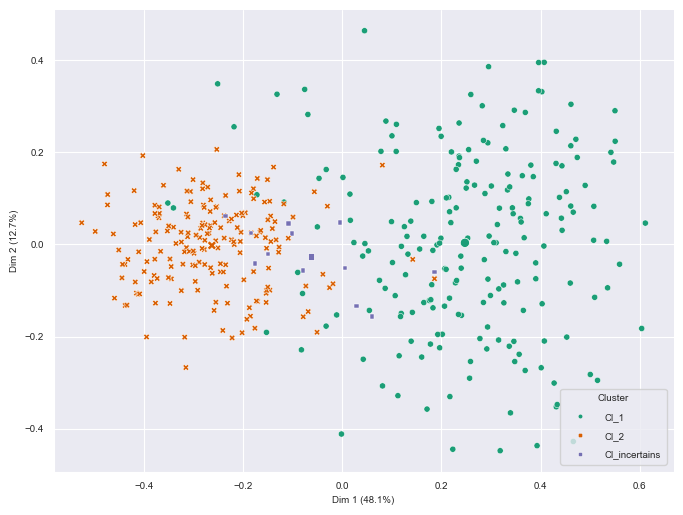

In [20]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")

# Plotting
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

In [21]:
top_weights = [model['W'] for model in model_list]
for W in top_weights:
    print(f"\n{W}")


[[0.49404261 0.0359033  0.26350173 0.04773334 0.02762219 0.13119683]
 [0.05097754 0.23573568 0.06742273 0.14707196 0.43464929 0.06414279]]

[[0.49404261 0.0359033  0.26350173 0.04773334 0.02762219 0.13119683]
 [0.05097754 0.23573568 0.06742273 0.14707196 0.43464929 0.06414279]]

[[0.11238256 0.20056701 0.1429425  0.17285504 0.24652883 0.12472407]
 [0.29162097 0.08597343 0.25736327 0.10263983 0.06595027 0.19645224]]

[[0.29162097 0.08597343 0.25736327 0.10263983 0.06595027 0.19645224]
 [0.11238256 0.20056701 0.1429425  0.17285504 0.24652883 0.12472407]]

[[0.29162097 0.08597343 0.25736327 0.10263983 0.06595027 0.19645224]
 [0.11238256 0.20056701 0.1429425  0.17285504 0.24652883 0.12472407]]

[[0.11238256 0.20056701 0.1429425  0.17285504 0.24652883 0.12472407]
 [0.29162097 0.08597343 0.25736327 0.10263983 0.06595027 0.19645224]]

[[0.29162097 0.08597343 0.25736327 0.10263983 0.06595027 0.19645224]
 [0.11238256 0.20056701 0.1429425  0.17285504 0.24652883 0.12472407]]

[[0.11238256 0.2005